**Objetivo da análise:**

1.   Qual a média de valor de frete? Qual desvio padrão? Qual foi o frete mais caro? E o mais barato?
* Valor médio de frete por estado no Brasil. (gráfico)

2.   Qual o valor médio das compras no Brasil? Qual foi a maior compra e qual foi a menor? Qual o desvio padrão?
* Valor médio de compra por estado no Brasil e comparar. (gráfico)

3.  Qual é a forma de pagamento mais utilizada no Brasil? E no caso de cartão de crédito, qual a porcentagem dos pagamentos parcelados?
* Formas de pagamento utilizadas nos últimos anos (gráfico)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('olist_pedidos_uf_pagamento.csv')
df

,order_id,order_status,freight_value,customer_city,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.72,sao paulo,SP,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.72,sao paulo,SP,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,8.72,sao paulo,SP,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,22.76,barreiras,BA,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,19.22,vianopolis,GO,credit_card,3,179.12
...,...,...,...,...,...,...,...,...
102456,9c5dedf39a927c1b2549525ed64a053c,delivered,13.08,sao jose dos campos,SP,credit_card,3,85.08
102457,63943bddc261676b46f01ca7ac2f7bd8,delivered,20.10,praia grande,SP,credit_card,3,195.00
102458,83c1379a015df1e13d02aae0204711ab,delivered,65.02,nova vicosa,BA,credit_card,5,271.01
102459,11c177c8e97725db2631073c19f07b62,delivered,40.59,japuiba,RJ,credit_card,4,441.16


In [3]:
#explorando os dados estatísticos gerais
df.describe().T

,count,mean,std,min,25%,50%,75%,max
freight_value,102461.0,20.138696,15.833759,0.0,13.18,16.36,21.26,409.68
payment_installments,102461.0,2.889724,2.713791,0.0,1.00,2.00,4.00,24.00
payment_value,102461.0,156.270867,216.634895,0.0,57.88,102.03,174.90,13664.08


In [4]:
#importando as bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#criando um df com a relação dos dados das média dos valores dos frete agrupado por estado
media_frete_uf = df.groupby('customer_state')['freight_value'].mean().sort_values(ascending=False).reset_index()
media_frete_uf

,customer_state,freight_value
0,PB,42.352924
1,RO,42.209264
2,RR,42.006829
3,AC,41.184286
4,PI,39.070000
5,TO,38.723000
6,MA,38.215040
7,SE,36.719684
8,RN,36.251196
9,AL,36.062734


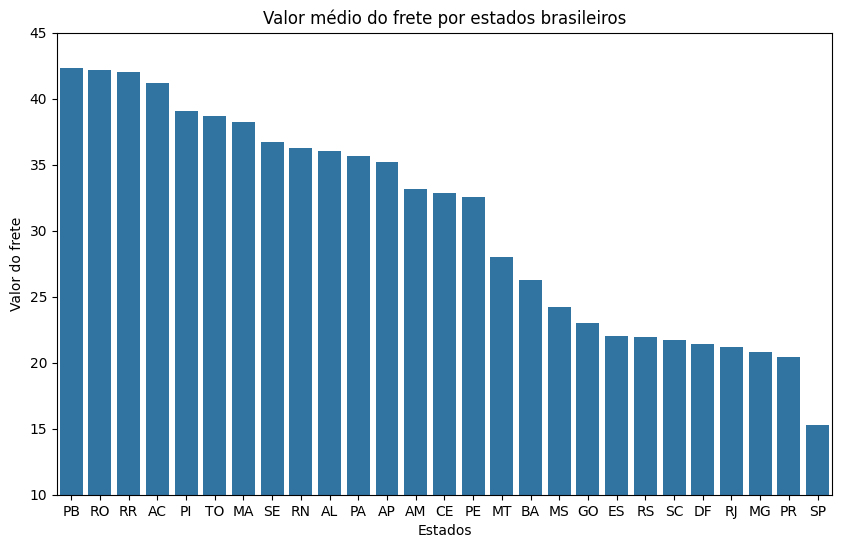

In [13]:
# Valor médio de frete por região no Brasil. (gráfico)

plt.figure(figsize=(10, 6))

sns.barplot(data = media_frete_uf,
            x = 'customer_state',
            y = 'freight_value')

plt.ylim(10, 45)
plt.title('Valor médio do frete por estados brasileiros')
plt.xlabel('Estados')
plt.ylabel('Valor do frete')

plt.show()

In [10]:
#criando uma df com a relação dos dados das compras dos clientes agrupado por estado
media_compras_uf = df.groupby('customer_state')['payment_value'].mean().sort_values(ascending=False).reset_index()
media_compras_uf

,customer_state,payment_value
0,PB,254.338718
1,AC,238.730238
2,AP,234.512429
3,RO,230.415233
4,AL,229.313046
5,RR,220.476098
6,PA,219.843918
7,TO,212.138241
8,PI,211.662947
9,MA,211.045960


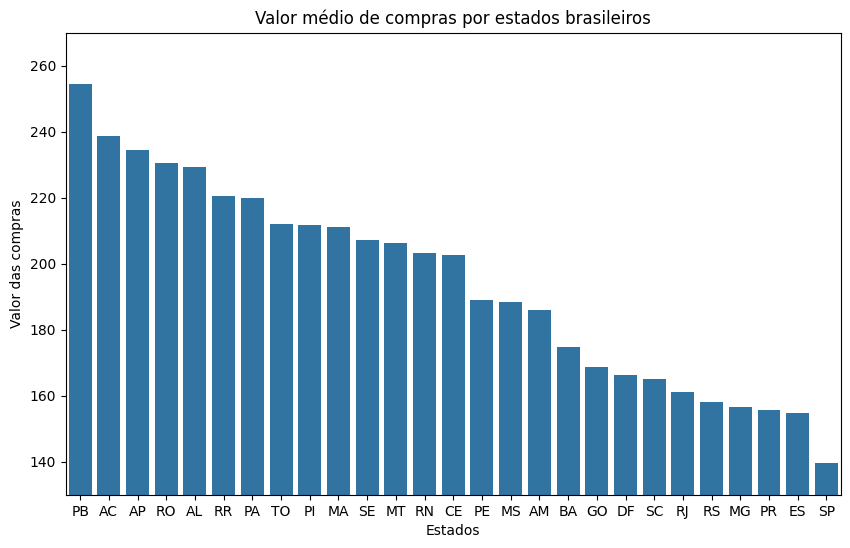

In [11]:
# Valor médio de compras por região no Brasil. (gráfico)

plt.figure(figsize=(10, 6))

sns.barplot(data = media_compras_uf,
            x = 'customer_state',
            y = 'payment_value')

plt.ylim(130, 270)
plt.title('Valor médio de compras por estados brasileiros')
plt.xlabel('Estados')
plt.ylabel('Valor das compras')

plt.show()

In [23]:
#explorando quais as formas de pagamentos aceitas pela olist
df['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [25]:
#fazendo a contagem das formas de pagamento utilizadas pelos clientes
contagem = df['payment_type'].value_counts(normalize=True).reset_index() #colocando em porcentagem
contagem

,payment_type,proportion
0,credit_card,0.744625
1,boleto,0.191204
2,voucher,0.049307
3,debit_card,0.014864


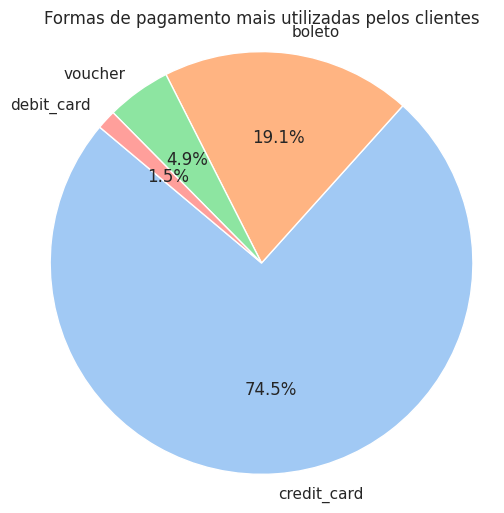

In [39]:
#Gráfico das formas de pagamento mais usadas

plt.figure(figsize=(6, 6))

labels = contagem['payment_type']
sizes = contagem['proportion']
colors = sns.color_palette('pastel')[0:len(labels)]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo

plt.title('Formas de pagamento mais utilizadas pelos clientes')
plt.show()

In [16]:
import numpy as np

In [18]:
#explorando cos parcelamentos das compras
df['payment_installments'].unique()

array([ 1,  3,  6, 10,  4,  2,  8,  9,  7,  5, 13, 12, 15, 14, 21, 18, 24,
       17, 11, 20, 23, 16, 22,  0])

In [41]:
#inserindo numa variavel
pay_installments = [ 1,  3,  6, 10,  4,  2,  8,  9,  7,  5, 13, 12, 15, 14, 21, 18, 24,
       17, 11, 20, 23, 16, 22,  0]

In [42]:
#converter a lista em uma série dos pandas
df_parcelamento = pd.Series(pay_installments)
df_parcelamento

0      1
1      3
2      6
3     10
4      4
5      2
6      8
7      9
8      7
9      5
10    13
11    12
12    15
13    14
14    21
15    18
16    24
17    17
18    11
19    20
20    23
21    16
22    22
23     0
dtype: int64

In [43]:
#filtrando os valores maiores que 1
df_parcelamento = df_parcelamento[df_parcelamento > 1]
df_parcelamento

1      3
2      6
3     10
4      4
5      2
6      8
7      9
8      7
9      5
10    13
11    12
12    15
13    14
14    21
15    18
16    24
17    17
18    11
19    20
20    23
21    16
22    22
dtype: int64

In [44]:
#transformando esses dados em porcentagem da relação de pagamentos a vista e parcelados
porcentagem_parcelamento = (len(df_parcelamento) / np.sum(len(pay_installments))) * 100
porcentagem_parcelamento

91.66666666666666